# Handling Imbalanced Data with SMOTE algorithm


- <span style="font-size:16px;"><strong>What is Imbalanced Data Distribution?</strong><br>
<br> It generally happens when observations in one of the classes are much higher or lower than the other classes. <br> </span>

- <span style="font-size:16px;"><strong>What is the problem with it?</strong><br><br>
Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to
ignore the minority class. <br><br></span>

- <span style="font-size:16px;">Let's see an example of Imbalanced Data: </span> </span>

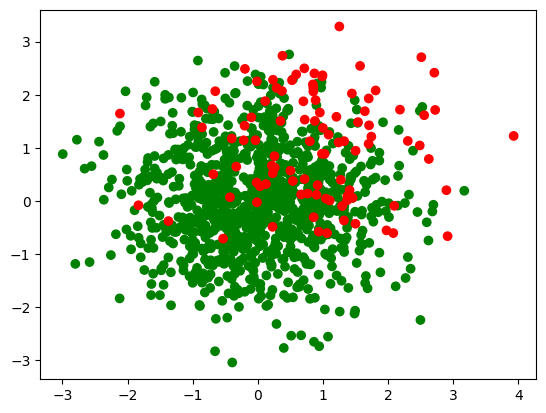

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Set a random seed for reproducibility
np.random.seed(0)

# Generate a balanced dataset
x1 = np.random.normal(0, 1, (1000, 2))
y1 = np.zeros((1000,))

# Generate an unbalanced dataset
x2 = np.random.normal(1, 1, (100, 2))
y2 = np.ones((100,))

# Combine the datasets
X = np.concatenate((x1 , x2), axis=0)
y = np.concatenate((y1 , y2), axis=0)

# Define a color map
colors = ['green', 'red']

# Plot the datasets
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()


- <span style="font-size:16px;">Befor applying Logistic Regression, we should split data in to train and test sets: </span>

In [2]:
from sklearn.model_selection import train_test_split 

# split the data into test and train sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 


Number transactions X_train dataset:  (770, 2)
Number transactions y_train dataset:  (770,)
Number transactions X_test dataset:  (330, 2)
Number transactions y_test dataset:  (330,)
Before OverSampling, counts of label '1': 62
Before OverSampling, counts of label '0': 708 




- <span style="font-size:16px;">We want to apply Logistic Regression on this dataset and train the model without handling the imbalanced class distribution: <br></span>

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, classification_report

# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
y_pred = lr.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       292
         1.0       0.71      0.13      0.22        38

    accuracy                           0.89       330
   macro avg       0.81      0.56      0.58       330
weighted avg       0.88      0.89      0.86       330



- <span style="color:green;font-size:16px;">Question: </span><span style="font-size:16px;">The accuracy comes out to be around 89% but did you notice something strange ? </span>

<details>
  <summary>Click to see answer</summary>
  
- <span style="font-size:16px;">The <span style="color:red;font-size:16px;"><strong>recall </strong></span>of the minority class in very less... <br> It proves that the model is more biased towards majority class. So, it proves that this is not the best model. </span>
</details>

- <span style="font-size:17px;"><strong>What is the solution?<br></strong></span>

    - <span style=" font-size:16px;">Two algorithms that are widely used for handling imbalanced class distribution are:</span><br>

    - <span style="font-size:17px;"><strong>1. SMOTE Algorithm  (<span style="font-size:15px;">Synthetic Minority Oversampling Technique</span>)</strong> </span> <br>
    - <span style="font-size:17px;"><strong>2. Near Miss Algorithm (<span style="font-size:15px;">Majority Under Sampling Technique</span>)</strong> </span> 
<br>
<span style="font-size:16px;">Here we are going to focus on <span style="color:blue; font-size:17px;"><strong>SMOTE</strong> </span> algorithm which aims to balance class distribution by randomly increasing minority class examples by replicating them.The steps are as follows: <br><br>
</span> 

- <span style="font-size:16px;"><strong>Step1: </strong> </span>
    - <span style="font-size:16px;"> Setting the minority class set A, For each $ x \in A $, the k-nearest neighbors of x are obtained by calculating the Euclidean   distance between x and every other sample in set A. </span><br><br>

- <span style="font-size:16px;"><strong>Step 2:  </strong><br>
    - <span style="font-size:16px;">For each $ x \in A $, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $ {A}_1 $<br> <span style="font-size:15px;">(The sampling rate N is set according to the imbalanced proportion.)<br>(A small value of k might capture noise in the data, while a large value might smooth over the data too much.) <br><br> </span>
- <span style="font-size:16px;"><strong>Step 3: </strong></span><br>
    - <span style="font-size:16px;">For each example
$ {x}_k \in {A}_1 $,(k=1, 2, 3…N), the following formula is used to generate a new example: <br><br>
      - $  x' = x + rand (0,1) * |x - {x}_{k}| $ </span>
      <br>
<span style="font-size:16px;">Now we want to Use SMOTE Algorithm and see the output: </span>

Before OverSampling, counts of label '1': 62
Before OverSampling, counts of label '0': 708 

After OverSampling, the shape of train_X: (1416, 2)
After OverSampling, the shape of train_y: (1416,) 

After OverSampling, counts of label '1': 708
After OverSampling, counts of label '0': 708


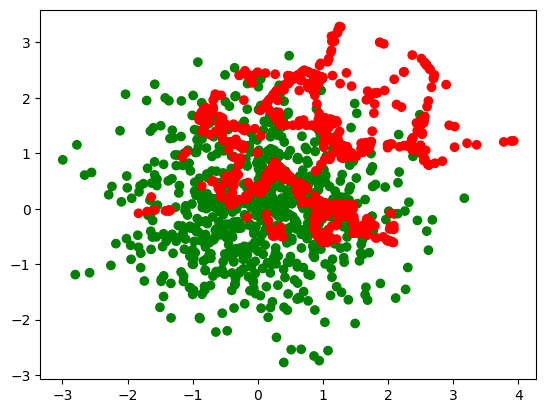

In [4]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

# Plot the datasets
plt.scatter(X_train_res[:, 0], X_train_res[:, 1], c=y_train_res, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()


In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, classification_report
lr_balanced = LogisticRegression() 
lr_balanced.fit(X_train_res, y_train_res.ravel()) 
y_pred_balanced = lr_balanced.predict(X_test) 
print(classification_report(y_test, y_pred_balanced)) 

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85       292
         1.0       0.29      0.74      0.42        38

    accuracy                           0.76       330
   macro avg       0.62      0.75      0.63       330
weighted avg       0.88      0.76      0.80       330



- <span style="font-size:16px;">Though, We have reduced the accuracy to 76% as compared to previous model but the recall value of minority class has also improved to 77%. This is a good model compared to the previous one. </span>